In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('gpu_data_real.csv', header=None, names=['Modelo', 'Marca', 'Preco', 'Data', 'Fonte'])

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

print(df.head())

modelo_desejado = 'RTX 3060'
df_modelo = df[df['Modelo'] == modelo_desejado]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_modelo, x='Data', y='Preco', hue='Marca', marker='o')
plt.title(f'Evolução de Preço - {modelo_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('gpu_data.csv',header=None, names=['Modelo', 'Data', 'Preco'])

# 4. Limpar e preparar os dados (como você já fazia)
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

df_btc = pd.read_csv('BTC.csv', sep=';')
df_btc = df_btc[['timestamp', 'close']].copy()
df_btc.rename(columns={'timestamp': 'Data', 'close': 'Preco_BTC'}, inplace=True)
df_btc['Data'] = pd.to_datetime(df_btc['Data'], format='ISO8601')
df_btc['Preco_BTC'] = pd.to_numeric(df_btc['Preco_BTC'], errors='coerce').dropna()

df_btc = df_btc[(df_btc['Data'] >= '2022-10-01') & (df_btc['Data'] <= '2025-05-31')]

df_btc_mensal = df_btc.groupby(df_btc['Data'].dt.to_period('M')).agg({'Preco_BTC': 'mean'}).reset_index()
df_btc_mensal['Data'] = df_btc_mensal['Data'].dt.to_timestamp()

# Remover linhas que possam ter tido erro na conversão
df.dropna(inplace=True)

print("\n--- Amostra do DataFrame Combinado ---")
print(df.head())
print("\nModelos encontrados no DataFrame:")
print(df['Modelo'].unique())


--- Amostra do DataFrame Combinado ---
  Modelo       Data       Preco
0   3060 2022-11-01  367.000000
1   3060 2022-12-01  361.285714
2   3060 2023-01-01  361.777778
3   3060 2023-02-01  332.428571
4   3060 2023-03-01  347.133333

Modelos encontrados no DataFrame:
['3060' '3070' '3070-ti' '3080']


C:\Users\y\AppData\Local\Temp\ipykernel_35608\2765606312.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_btc_mensal = df_btc.groupby(df_btc['Data'].dt.to_period('M')).agg({'Preco_BTC': 'mean'}).reset_index()


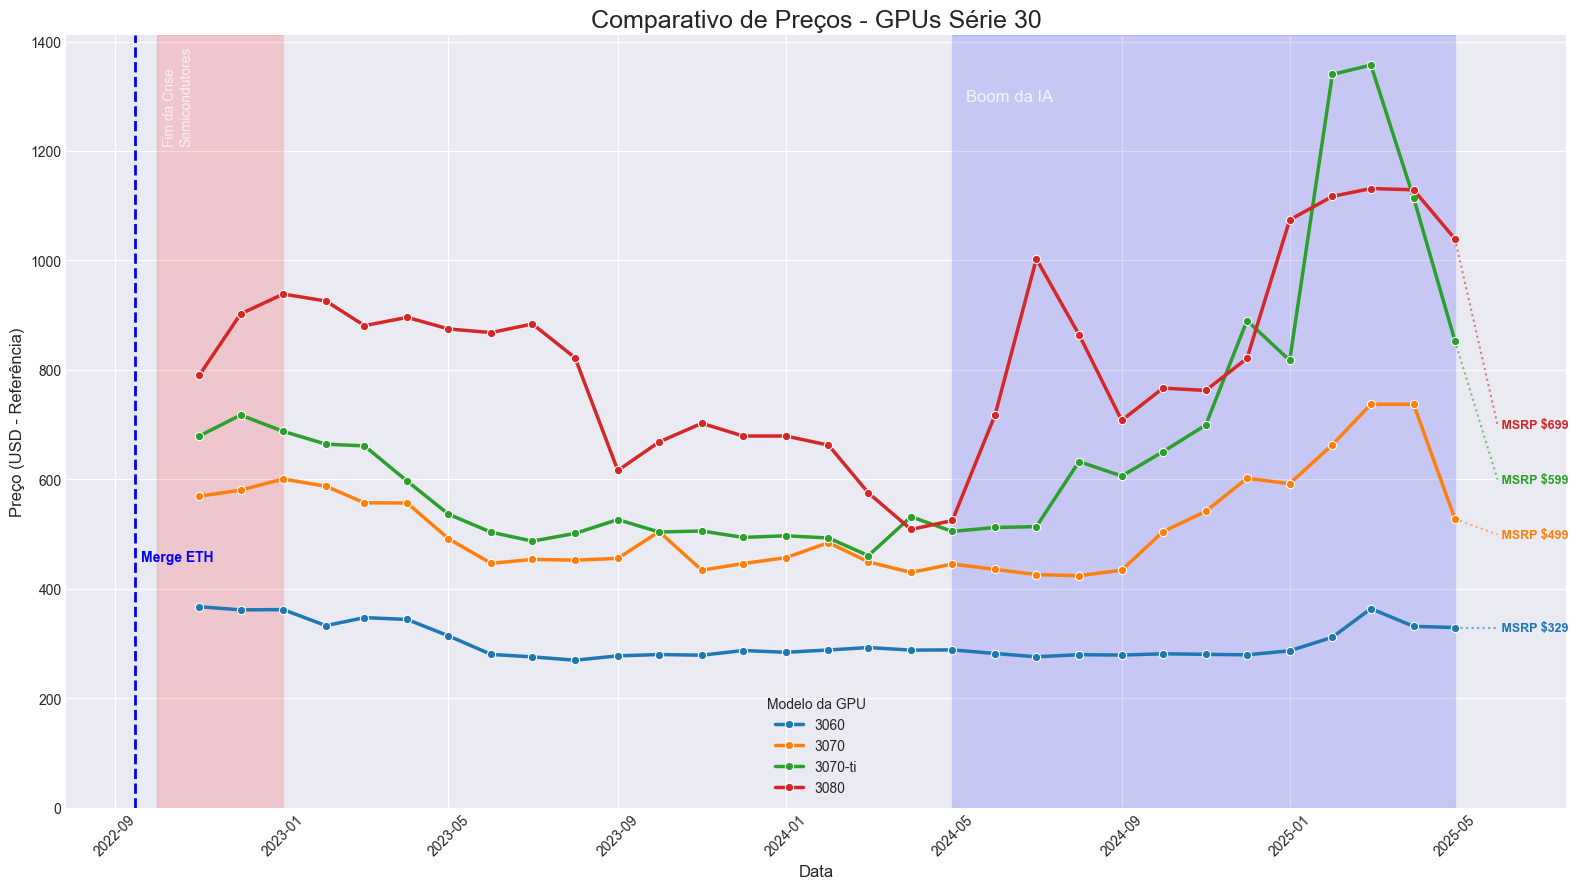

In [46]:


# 5. Criar o gráfico com todas as linhas
plt.style.use('seaborn-v0_8-darkgrid') # Usando um estilo escuro
#lt.figure(figsize=(14, 8)) # Aumentei o tamanho para melhor visualização
fig, ax = plt.subplots(figsize=(16, 9)) # Figura maior para comportar as anotações

sns.lineplot(
    data=df,
    x='Data',
    y='Preco',
    hue='Modelo',  # Cria uma linha para cada 'Modelo'
    marker='o',      # Adiciona um marcador a cada ponto de dado
    linewidth=2.5    # Linhas um pouco mais grossas
)

# --- ANOTAÇÕES VISUAIS DE EVENTOS ---
# Período: Fim da Crise de Semicondutores
ax.axvspan(pd.to_datetime('2022-10-01'), pd.to_datetime('2023-01-01'), color='red', alpha=0.15)
ax.text(pd.to_datetime('2022-10-01') + pd.DateOffset(days=5), 1300, 'Fim da Crise\nSemicondutores', rotation=90, verticalalignment='center', fontsize=10, color='white', alpha=0.7)

# Evento: Merge do Ethereum
ax.axvline(x=pd.to_datetime('2022-09-15'), color='blue', linestyle='--', linewidth=2)
ax.text(pd.to_datetime('2022-09-20'), 450, 'Merge ETH', fontsize=10, color='blue', weight='bold')

# Período: Boom da IA
ax.axvspan(pd.to_datetime('2024-05-01'), df['Data'].max(), color='blue', alpha=0.15)
ax.text(pd.to_datetime('2024-05-11'), 1300, 'Boom da IA', verticalalignment='center', fontsize=12, color='white', alpha=0.8)

# --- ANOTAÇÕES DE MSRP (MÉTODO ELEGANTE) ---
msrp_data = {'3060': 329, '3070': 499, '3070-ti': 599, '3080': 699}
cores_das_linhas = {line.get_label(): line.get_color() for line in ax.get_lines() if line.get_label() in msrp_data}

for modelo, msrp in msrp_data.items():
    df_modelo = df[df['Modelo'] == modelo]
    if not df_modelo.empty:
        ultimo_ponto = df_modelo.iloc[-1]
        ax.text(ultimo_ponto['Data'] + pd.DateOffset(months=1), msrp, f" MSRP ${msrp}", color=cores_das_linhas.get(modelo, 'white'), fontsize=9, weight='bold', verticalalignment='center')
        ax.plot([ultimo_ponto['Data'], ultimo_ponto['Data'] + pd.DateOffset(months=1)], [ultimo_ponto['Preco'], msrp], linestyle=':', color=cores_das_linhas.get(modelo, 'white'), alpha=0.6)


# 6. Melhorar o visual do gráfico
plt.title('Comparativo de Preços - GPUs Série 30', fontsize=18)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD - Referência)', fontsize=12)
ax.set_ylim(bottom=0) # Garante que o eixo Y comece em 0
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Modelo da GPU') # Melhora a legenda
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()

